### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#To read the data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
#check the first five values
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,Non-smoker,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,Non-smoker,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,NaN,20.0,0,0,No,Private,Urban,55.25,20.4,Non-smoker,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0


In [3]:
#check the last five values
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,Non-smoker,0
5106,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,Non-smoker,0
5107,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,Formelly-smoker,0
5108,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,Smoker,0
5109,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,Formelly-smoker,1


## 1. Data Analysis

#### Checking the dimension of the data

In [4]:
df.shape

(5110, 12)

#### summary of all the variable in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5066 non-null   object 
 2   age                4820 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5050 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


    The data set has 12 variables out of which 7 are numerical, and 6 are categorical. 
    4 variables have null values (gender,age, Residence_typr, bmi).

In [6]:
# dropping the id column as it donot give any relavent information to this dataset
df.drop('id', axis = 1 , inplace = True)

In [7]:
# Changing datatype of hypertension, heart_disease, and stroke as they have categorical values
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

#### The statistical summary of numeric variables:

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4820.0,45.681328,20.830368,5.00,29.000,47.000,62.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


      This dataset provides information on individuals' age, average glucose level, and BMI. 
      The mean age is 45.7 years, mean glucose level is 106.1 mg/dL, and mean BMI is 28.9 kg/m^2.

#### The statistical summary of categorical variables:

In [9]:
df.describe(include = object).T

,count,unique,top,freq
gender,5066,2,Female,2969
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5050,2,Urban,2566
smoking_status,5110,4,Non-smoker,1892
stroke,5110,2,0,4861


    This dataset provides that unique values that are from 2 to 5
    The most frequent values are female in gender, no hypertension in hypertension, no heart disease in heart_disease, being married in ever_married, private sector in work_type, urban areas in Residence_type, being a smoker in smoking_status.

### Variable type

In [10]:
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

     Interpretation: Refer to the data definition and check whether the data has been correctly identified. Now based on the result, classify the various data columns into numerical/categorical attributes:
     Numerical Attributes: age,  avg_glucose_level, bmi
     Categorical attributes : gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke

## 2. Data Cleaning

### Treating Missing values

In [11]:
# Checking for the number of missing values
missing_values = df.isnull().sum()
missing_values

gender                44
age                  290
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type        60
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Heat map of missing values

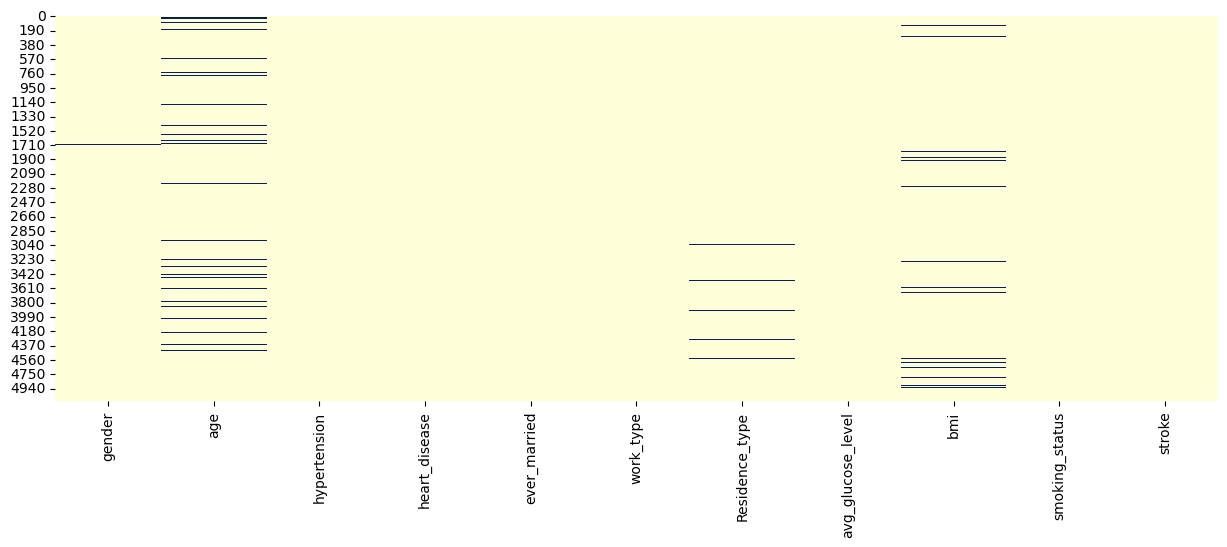

In [12]:
#let us plot a heatmap of the missing values

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

It is seen that there are four variables that have missing data. Let us find the percentage of missing data in each variable. 

In [13]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = list(df.isnull().sum())

# calculate percentage of the missing values
percent = round(((df.isnull().sum()/df.shape[0])*100),2)

percent = [str(i)+"%" for i in percent]

# concatenate the total missing values and percentage of the missing values
missing_data = pd.DataFrame({"total":total,"percent":percent})

#add the data types
missing_data.index=df.columns
missing_data['Type'] = df[missing_data.index].dtypes

#view the missing data   
missing_data.sort_values(by='total', ascending=False, inplace=True)
missing_data

,total,percent,Type
age,290,5.68%,float64
bmi,201,3.93%,float64
Residence_type,60,1.17%,object
gender,44,0.86%,object
hypertension,0,0.0%,object
heart_disease,0,0.0%,object
ever_married,0,0.0%,object
work_type,0,0.0%,object
avg_glucose_level,0,0.0%,float64
smoking_status,0,0.0%,object


    The variable representing the age has 5.68% missing data. Similarly bmi has 3.94% missing value and Residence_type has 1.17% missing values.
    Note : If more than 70% of the data is missing we exclude the column from further analysis. 

### 1 . Age

In [14]:
# get the count of missing values in age
df.age.isnull().sum()

290

    There are 290 missing values detected by python.
    This is a numerical variable so we will replace NaN values with mean.

In [15]:
df.age.replace(np.NaN,df.age.mean(),inplace = True)

In [16]:
# check if there are  null values
df.age.isnull().sum()

0

There are no more missing values in the data.
    

### 2 . BMI

In [17]:
# check if there are  null values in bmi
df.bmi.isnull().sum()

201

      There are 201 missing values detected by python.
      This is a numerical variable so we will replace NaN values with mean.

In [18]:
df.bmi.replace(np.NaN,df.bmi.mean() ,inplace = True)

In [19]:
# check if there are  null values
df.bmi.isnull().sum()

0

### 3 . Gender

In [20]:
# check if there are  null values in gender
df.gender.isnull().sum()

44

    There are 44 missing values detected by python
    This is a numerical variable so we will replace NaN values with mean.

In [21]:
df.gender.mode()

0    Female
Name: gender, dtype: object

In [22]:
df.gender.replace(np.NaN,'Female',inplace = True)

In [23]:
# check if there are  null values
df.gender.isnull().sum()

0

### 4 . Residence_type

In [24]:
# # check if there are  null values in residence_type
df.Residence_type.isna().sum()

60

     There are 60 missing values detected by python
     This is a categorical variable so we will replace NaN values with mode.

In [25]:
df.Residence_type.mode()

0    Urban
Name: Residence_type, dtype: object

In [26]:
df.Residence_type.replace(np.NaN,'Urban',inplace = True)

In [27]:
# check if there are  null values
df.Residence_type.isnull().sum()

0

## Univariate Analysis

#### Analyze Numerical Variables

In [28]:
df_numeric_features = df.select_dtypes(include='number')
df_numeric_features

,age,avg_glucose_level,bmi
0,21.0,55.12,21.8
1,42.0,55.22,27.0
2,66.0,55.23,28.9
3,20.0,55.25,20.4
4,61.0,55.26,33.2
...,...,...,...
5105,60.0,266.59,25.5
5106,76.0,267.60,30.5
5107,76.0,267.61,27.9
5108,49.0,267.76,29.3


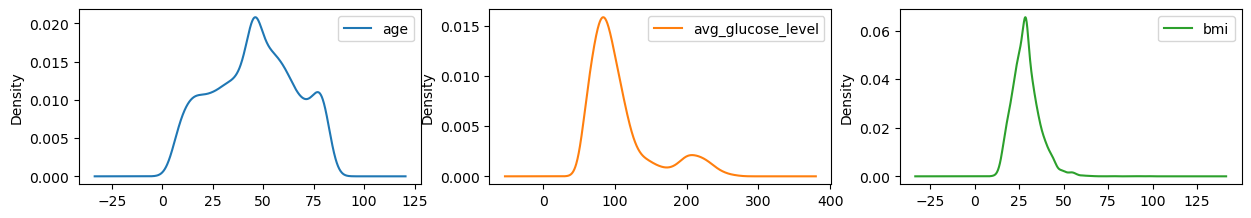

In [29]:
# Distribution of numerical data

df.plot(kind = 'density', subplots = True, layout = (2,3), sharex = False)

# displat the plot
plt.show()

In [30]:
df.skew()

age                 -0.078573
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.076716
stroke               4.193284
dtype: float64

In [31]:
df.skew().age

-0.07857271743610277

The skewness score of -0.078 for Age indicates that the distribution of ages is slightly left-skewed. This means that there are slightly more people with higher ages than lower ages


In [32]:
df.skew().avg_glucose_level

1.5722838665030452

The skewness score of 1.5722 for average glucose level indicates that the distribution of glucose levels is slightly right-skewed. This means that there are slightly more people with lower glucose levels than higher glucose levels


In [33]:
df.skew().bmi

1.0767160713842094

The skewness score of 1.076 for BMI indicates that the distribution of BMIs is slightly right-skewed. This means that there are slightly more people with lower BMIs than higher BMIs.

#### Analysis of categorical variables

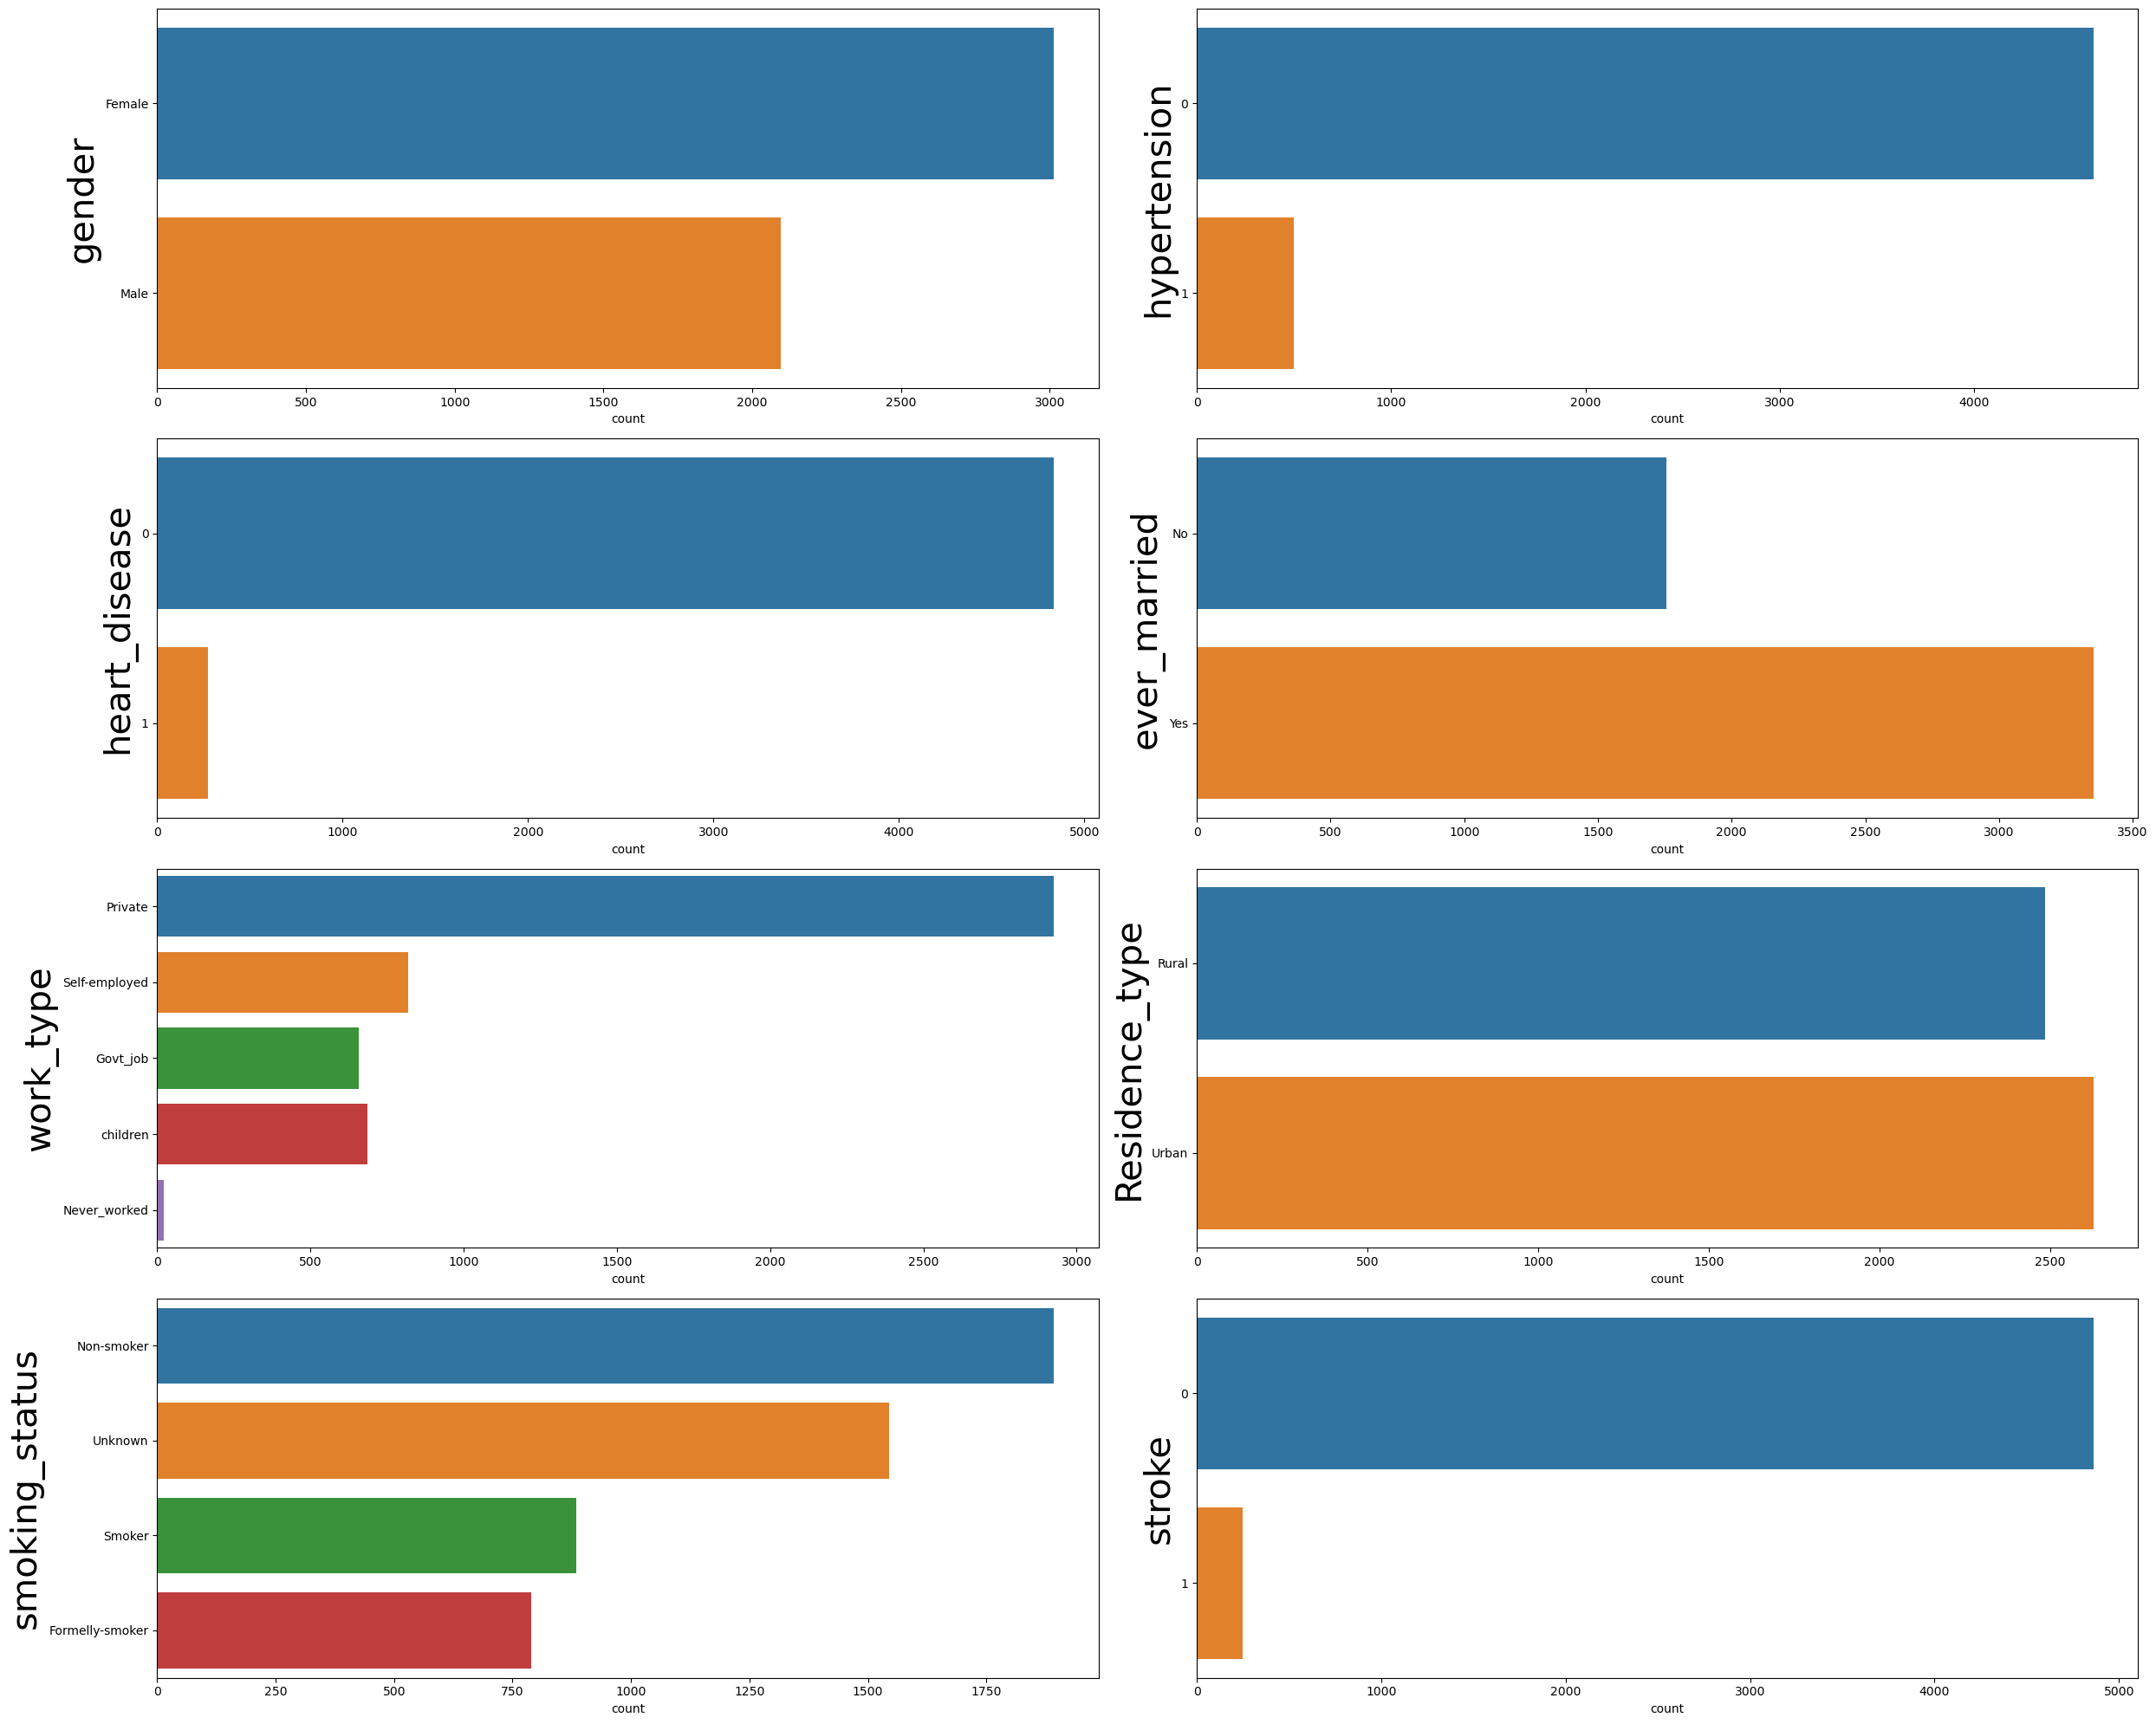

In [34]:
df_categoric_features = df.select_dtypes(include='object').columns
# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot)
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

## Bivariate Analysis

### Analyze Relationship Between All Numericals Variable 

The correlation between age and average glucose level (0.23) is stronger compared to age and BMI (0.21), while the correlation between BMI and average glucose level (0.17) is relatively weaker

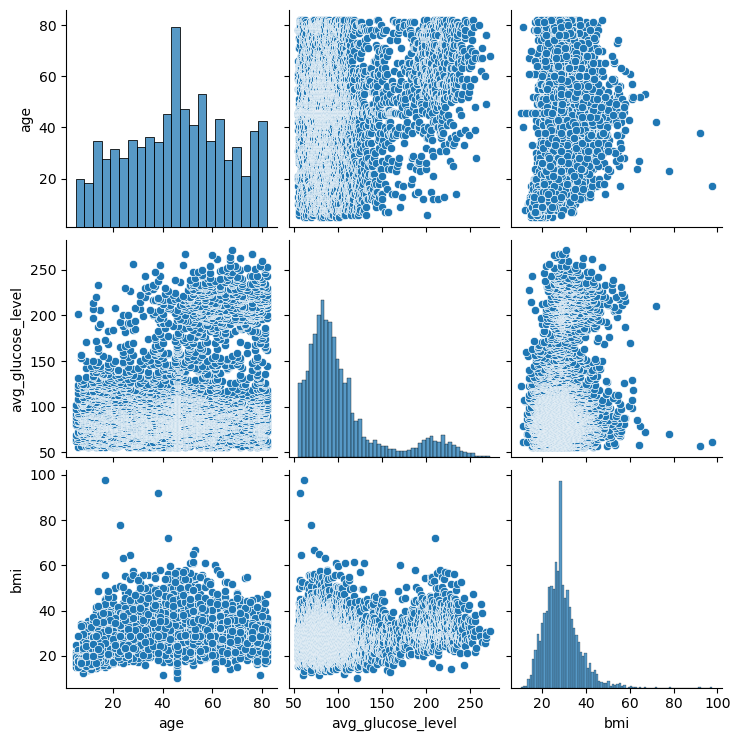

In [35]:
sns.pairplot(df)

We can identifying potential outliers, correlations, and trends in the dataset.

### Analyze Relationship Between Numerical and Target Variable

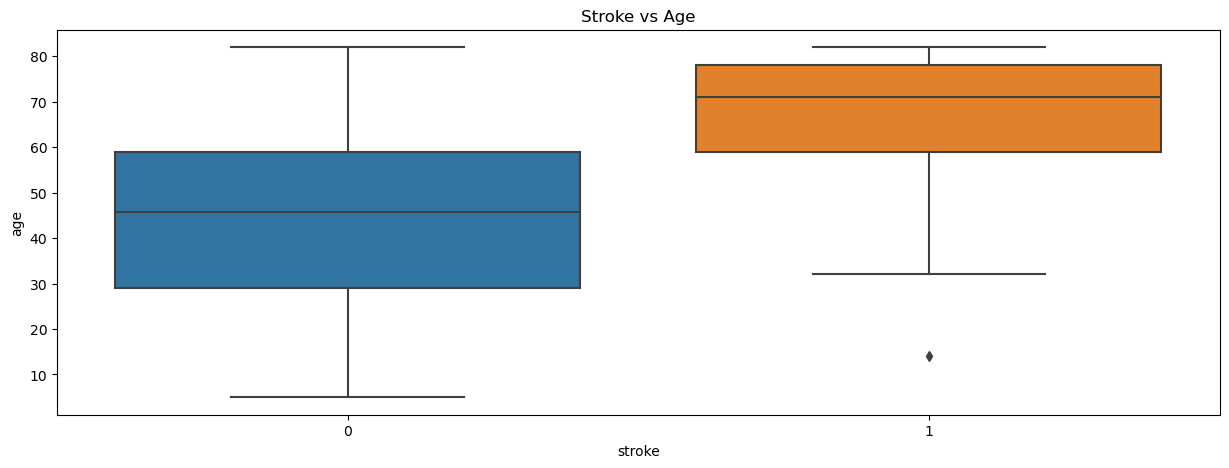

In [36]:
sns.boxplot(x="stroke", y="age", data=df)
plt.title("Stroke vs Age")
plt.show()


    There are 25% people who doesn't have heart stroke in age between 60-80 years. 
    The probability of experiencing a heart stroke among individuals aged between 60 and 80 years is 75%

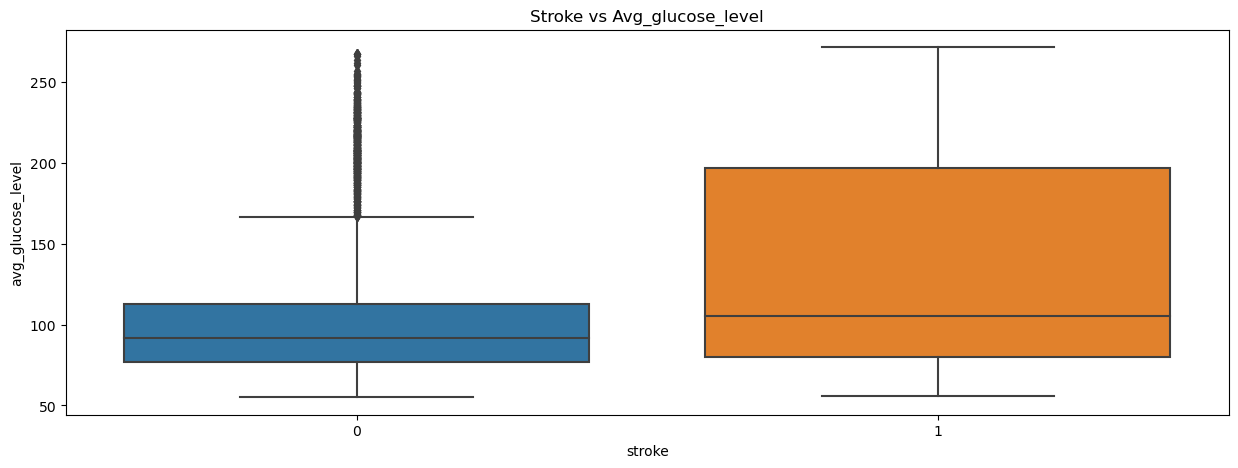

In [37]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.title("Stroke vs Avg_glucose_level")
plt.show()

    There are 75% chances who have heart stroke and their avg_glucose_level is between 50-200
    whose avg_glucose_level is 50-100 they have 75% chance of not having heart stroke

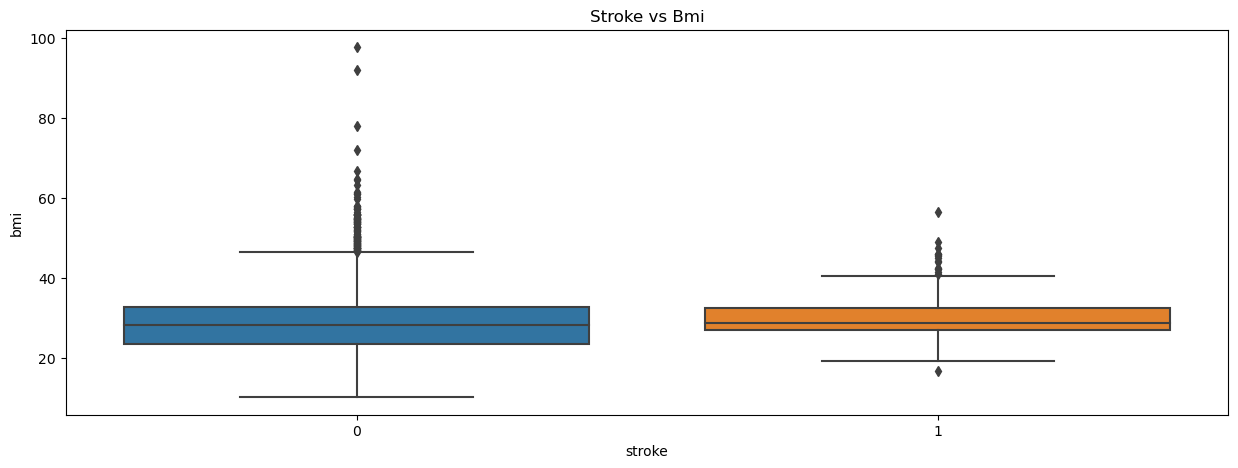

In [38]:
sns.boxplot(x="stroke", y="bmi", data=df)
plt.title("Stroke vs Bmi")

plt.show()

There are more chances of having heart stroke whose bmi is between 20-37


### Analyze Relationship Between Categorical and Target Variables

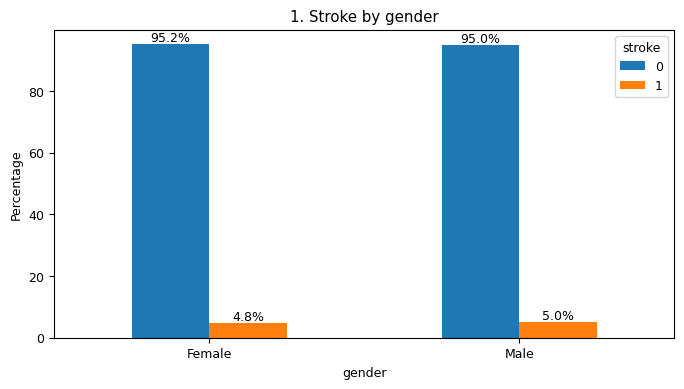

There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males. 

------------------------------------------------------------------------------------------------------------------------


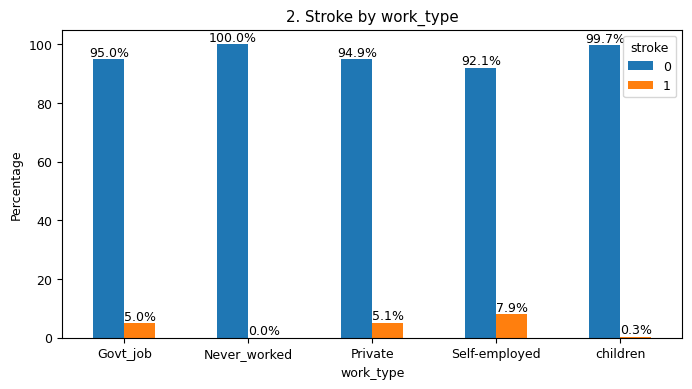

Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs. 

------------------------------------------------------------------------------------------------------------------------


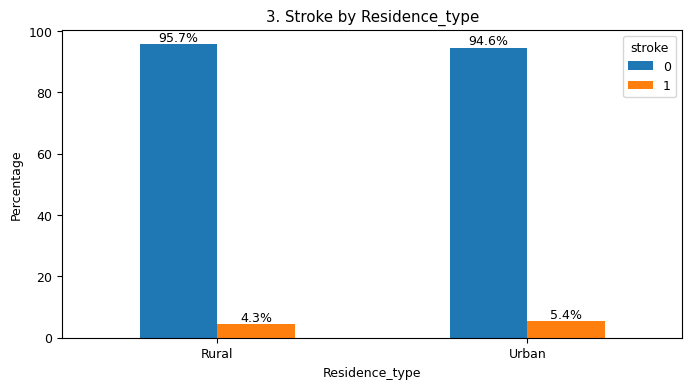

There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas. 

------------------------------------------------------------------------------------------------------------------------


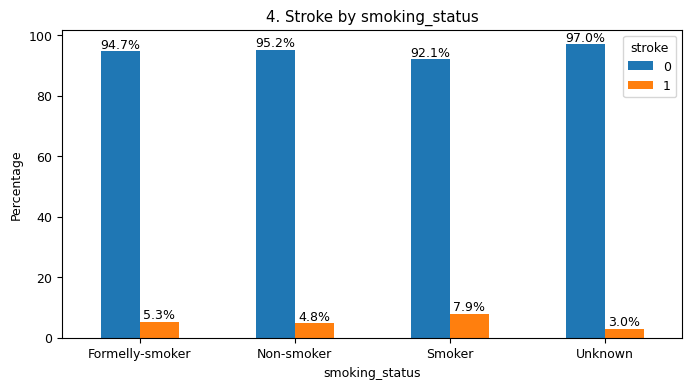

Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker. 

------------------------------------------------------------------------------------------------------------------------


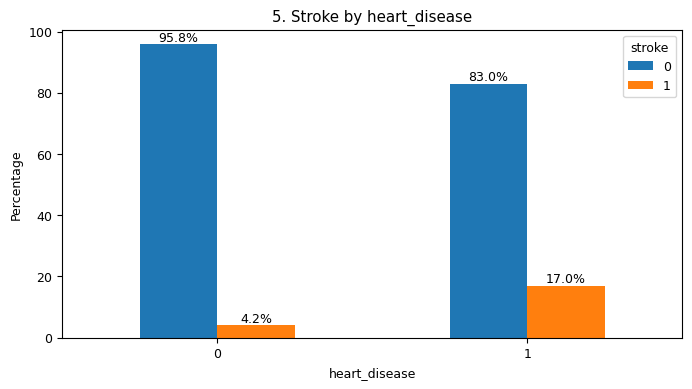

Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


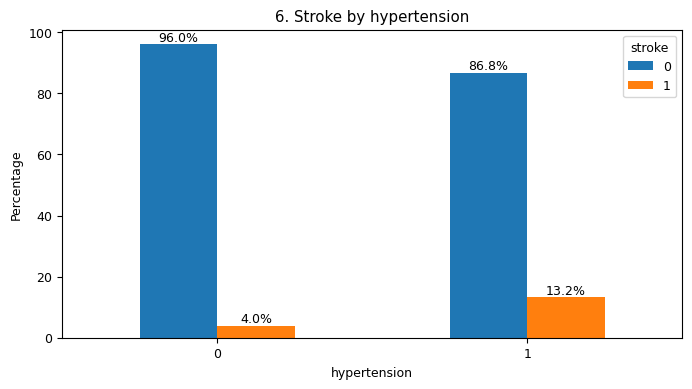

Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


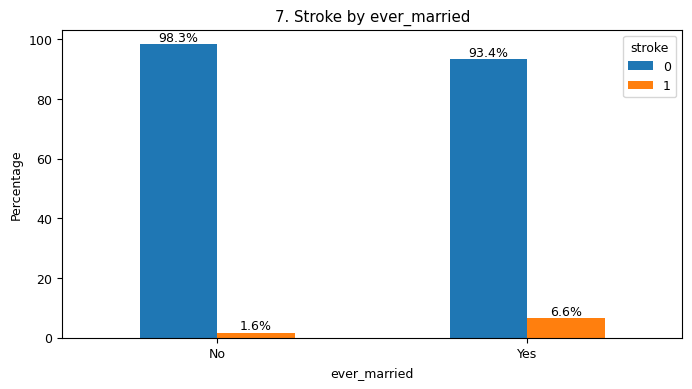

Married individuals have a higher risk of experiencing a stroke compared to those who are not married. 

------------------------------------------------------------------------------------------------------------------------


In [39]:
l=['gender','work_type','Residence_type','smoking_status','heart_disease','hypertension','ever_married']
lis =  ["There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males.",
"Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs.",
"There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas.",
"Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker.",
"Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke.",
"Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke.",
"Married individuals have a higher risk of experiencing a stroke compared to those who are not married."]
plt.rcParams.update({'font.size': 9})
for i in range(len(l)):
   
    gender_counts = df[l[i]].value_counts(normalize=True) * 100
    stroke_counts = round(df.groupby(l[i])['stroke'].value_counts(normalize=True) * 100,2)
    crosstab_data = stroke_counts.unstack()

    # Create bar plot
    ax = crosstab_data.plot(kind='bar', figsize=(8,4))
    ax.set_title(f"{i+1}. Stroke by {l[i]}")
    ax.set_ylabel('Percentage')

    # Add data labels to the bars
    for j in ax.containers:
        ax.bar_label(j, labels=[f"{x:.1f}%" for x in j.datavalues], label_type='edge')
    plt.xticks(rotation=0)
    plt.show()

    print(lis[i],"\n")
    print("------------------------------------------------------------------------------------------------------------------------")

## 3. Feature Engineering

#### Outlier Detection

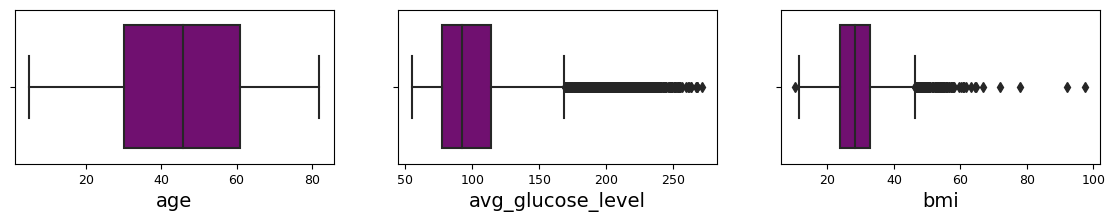

In [40]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis laber
    z.set_xlabel(variable, fontsize = 14) 

There are many outliers in avg_glucose_level and bmi

In [41]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                  31.000
avg_glucose_level    36.845
bmi                   9.000
dtype: float64


In [42]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

This line of code removes rows from the DataFrame (df) where any of the values fall outside the range of (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR), where Q1 is the first quartile and Q3 is the third quartile of the data. It is used to filter out potential outliers in the data.

In [43]:
# again checking the shape of the dataset
df.shape

(4391, 11)

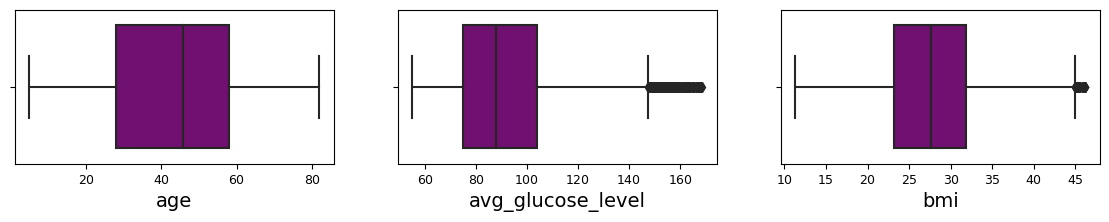

In [44]:
# plot the boxplot for each variable after removing the outliers
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis label
    z.set_xlabel(variable, fontsize = 14)

#### Encoding of categorical columns

In [45]:
# Label Encoding of 'gender', 'ever_married' and 'Residence_type' because this columns have only 2 unique values
df.gender.unique(),df.ever_married.unique(),df.Residence_type.unique()

(array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Urban'], dtype=object))

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married','Residence_type']].apply(le.fit_transform)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,21.000000,0,0,0,Private,0,55.12,21.8,Non-smoker,0
1,1,42.000000,0,0,1,Private,1,55.22,27.0,Non-smoker,0
2,1,66.000000,0,0,1,Self-employed,0,55.23,28.9,Unknown,0
3,0,20.000000,0,0,0,Private,1,55.25,20.4,Non-smoker,0
4,1,61.000000,0,0,1,Private,0,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4477,0,77.000000,0,0,1,Govt_job,0,167.59,34.3,Smoker,0
4478,1,45.681328,0,0,0,children,1,167.66,18.7,Unknown,0
4479,1,55.000000,1,0,1,Private,1,168.06,23.5,Formelly-smoker,0
4480,0,26.000000,0,0,0,Private,1,168.15,22.9,Non-smoker,0


In [47]:
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married', 'Residence_type']].astype('object')


In [48]:
# One hot encoding of 'work_type' and 'smoking_status' because this columns have more than two unique values
df.work_type.unique(),df.smoking_status.unique()

(array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['Non-smoker', 'Unknown', 'Smoker', 'Formelly-smoker'], dtype=object))

In [49]:
df=pd.get_dummies(df, columns= ['work_type','smoking_status'],drop_first=True)

In [50]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0,21.000000,0,0,0,0,55.12,21.8,0,0,1,0,0,1,0,0
1,1,42.000000,0,0,1,1,55.22,27.0,0,0,1,0,0,1,0,0
2,1,66.000000,0,0,1,0,55.23,28.9,0,0,0,1,0,0,0,1
3,0,20.000000,0,0,0,1,55.25,20.4,0,0,1,0,0,1,0,0
4,1,61.000000,0,0,1,0,55.26,33.2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0,77.000000,0,0,1,0,167.59,34.3,0,0,0,0,0,0,1,0
4478,1,45.681328,0,0,0,1,167.66,18.7,0,0,0,0,1,0,0,1
4479,1,55.000000,1,0,1,1,168.06,23.5,0,0,1,0,0,0,0,0
4480,0,26.000000,0,0,0,1,168.15,22.9,0,0,1,0,0,1,0,0


#### Standardize the data

In [51]:
# # import StandardScaler
# from sklearn.preprocessing import StandardScaler

# # instantiate the standardscaler
# standard_scale = StandardScaler()

# # fit the StandardScaler
# df[['bmi','avg_glucose_level','age']] = standard_scale.fit_transform(df[['bmi','avg_glucose_level','age']])

In [52]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0,21.000000,0,0,0,0,55.12,21.8,0,0,1,0,0,1,0,0
1,1,42.000000,0,0,1,1,55.22,27.0,0,0,1,0,0,1,0,0
2,1,66.000000,0,0,1,0,55.23,28.9,0,0,0,1,0,0,0,1
3,0,20.000000,0,0,0,1,55.25,20.4,0,0,1,0,0,1,0,0
4,1,61.000000,0,0,1,0,55.26,33.2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0,77.000000,0,0,1,0,167.59,34.3,0,0,0,0,0,0,1,0
4478,1,45.681328,0,0,0,1,167.66,18.7,0,0,0,0,1,0,0,1
4479,1,55.000000,1,0,1,1,168.06,23.5,0,0,1,0,0,0,0,0
4480,0,26.000000,0,0,0,1,168.15,22.9,0,0,1,0,0,1,0,0


In [53]:
df.shape

(4391, 16)

In [54]:
# export the data for using it later
# df.to_csv("healthcare_dataset_strokes_cleaned.csv")

In [55]:
df.stroke.unique()

array(['0', '1'], dtype=object)

## 4. Model Development 

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [57]:
#pip install imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y.value_counts())

print("After SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
0    4226
1     165
Name: stroke, dtype: int64
After SMOTE:
0    4226
1    4226
Name: stroke, dtype: int64


In [59]:
df=pd.concat([X_resampled,y_resampled],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown,stroke
0,0.0,21.000000,0.0,0.0,0.0,0.0,55.120000,21.800000,0,1,0,0,1,0,0,0
1,1.0,42.000000,0.0,0.0,1.0,1.0,55.220000,27.000000,0,1,0,0,1,0,0,0
2,1.0,66.000000,0.0,0.0,1.0,0.0,55.230000,28.900000,0,0,1,0,0,0,1,0
3,0.0,20.000000,0.0,0.0,0.0,1.0,55.250000,20.400000,0,1,0,0,1,0,0,0
4,1.0,61.000000,0.0,0.0,1.0,0.0,55.260000,33.200000,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1.0,57.218564,0.0,0.0,1.0,0.804641,83.384242,29.324348,0,0,0,0,0,0,0,1
8448,0.913251,70.566257,0.0,0.0,1.0,1.0,102.746817,27.346886,0,0,0,0,0,0,0,1
8449,1.0,76.789111,0.394556,0.0,1.0,0.605444,138.008856,31.359855,0,0,0,0,0,0,0,1
8450,0.942905,80.942905,0.0,0.0,1.0,1.0,72.851679,26.168682,0,1,0,0,0,0,0,1


In [60]:
# Set the threshold value
threshold = 0.5

# List of columns to apply the threshold
threshold_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

# Iterate over the columns and apply the threshold
for column in threshold_columns:
    df[column] = df[column].apply(lambda x: 1 if x >= threshold else 0)


In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Step 1: Load and preprocess your data
# X contains the features, y contains the target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]
y = y.astype(int)

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN Classifier

### Findinf best K for KNN

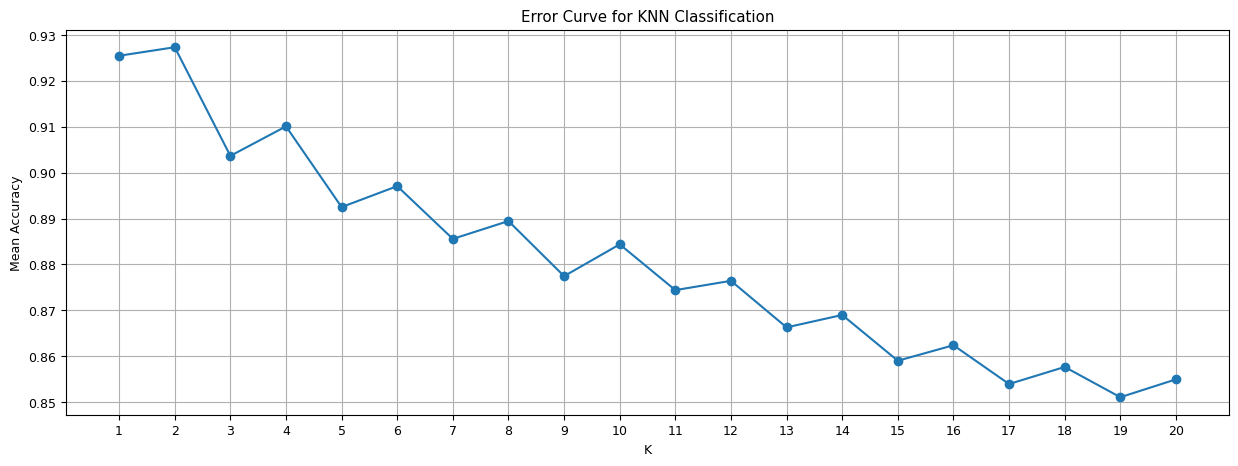

Best K: 2


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Define a range of K values to evaluate
k_values = range(1, 21)

# Initialize an empty list to store the mean accuracy scores
mean_accuracy_scores = []

# Iterate over each K value
for k in k_values:
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Calculate the mean accuracy score
    mean_accuracy = scores.mean()
    mean_accuracy_scores.append(mean_accuracy)

# Plot the error curve
plt.plot(k_values, mean_accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Error Curve for KNN Classification')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best K value with the highest mean accuracy score
best_k = k_values[np.argmax(mean_accuracy_scores)]
print('Best K:', best_k)


In [69]:
# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
knn_preds = knn.predict(X_test)

# Calculate evaluation metrics
knn_cm = confusion_matrix(y_test, knn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)
knn_f1 = f1_score(y_test, knn_preds)
knn_auc = roc_auc_score(y_test, knn_preds)

# Print the evaluation metrics for KNN
print("K-Nearest Neighbors:")
print("Confusion Matrix:\n", knn_cm)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("AUC Score:", knn_auc)
print()


K-Nearest Neighbors:
Confusion Matrix:
 [[ 944  325]
 [  30 1237]]
Accuracy: 0.8600157728706624
Precision: 0.791933418693982
Recall: 0.9763220205209155
F1 Score: 0.8745139625309296
AUC Score: 0.8601074247600637



### LogisticRegression

In [129]:
# Initialize and fit models
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Make predictions
lr_preds = lr.predict(X_test)
#lr_preds = lr_preds.astype(int)

# Calculate evaluation metrics
lr_cm = confusion_matrix(y_test, lr_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_preds)

# Print the evaluation metrics for each algorithm
print("Logistic Regression:")
print("Confusion Martix:\n", lr_cm)
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print("Auc_score:", lr_auc)
print()

Logistic Regression:
Confusion Martix:
 [[1089  180]
 [ 164 1103]]
Accuracy: 0.8643533123028391
Precision: 0.8597038191738113
Recall: 0.8705603788476717
F1 Score: 0.8650980392156863
Auc_score: 0.864358203608233



### Decission Tree

In [130]:
# Initialize and fit the Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_preds = dt.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_preds)
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)

# Print the evaluation metrics for the Decision Tree classifier
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("AUC Score:", dt_auc)

Decision Tree Classifier:
Confusion Matrix:
 [[1161  108]
 [  77 1190]]
Accuracy: 0.9270504731861199
Precision: 0.9167950693374423
Recall: 0.9392265193370166
F1 Score: 0.9278752436647174
AUC Score: 0.9270600681791465


## 5. Validation and Iteration

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree classifier
dt = DecisionTreeClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9274853784469169


In [132]:
# Initialize and fit the Decision Tree classifier with the best parameters
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

# Make predictions
dt_preds = dt.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_preds)
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)

# Print the evaluation metrics for the Decision Tree classifier
print("Decision Tree Classifier (Best Parameters):")
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("AUC Score:", dt_auc)


Decision Tree Classifier (Best Parameters):
Confusion Matrix:
 [[1158  111]
 [  72 1195]]
Accuracy: 0.9278391167192429
Precision: 0.9150076569678407
Recall: 0.9431728492501973
F1 Score: 0.9288767975126312
AUC Score: 0.9278512000388103


## Feature Selection: Recursive feature elimination

In [133]:
from sklearn.feature_selection import RFE

# Create the RFE object and specify the estimator (model) and the number of features to select
estimator = DecisionTreeClassifier(**best_params)
rfe = RFE(estimator, n_features_to_select=10)  # Select 10 features

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_
selected_feature_names = X_train.columns[selected_features]

print("Selected features:")
print(selected_feature_names)


Selected features:
Index(['gender', 'age', 'Residence_type', 'avg_glucose_level', 'bmi',
       'work_type_Private', 'work_type_Self-employed',
       'smoking_status_Non-smoker', 'smoking_status_Smoker',
       'smoking_status_Unknown'],
      dtype='object')


### Decission Tree With Best Selected features

In [134]:
# Initialize and fit the Decision Tree classifier
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train[selected_feature_names], y_train)

# Make predictions
dt_preds = dt.predict(X_test[selected_feature_names])

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_preds)
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)

# Print the evaluation metrics for the Decision Tree classifier
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("AUC Score:", dt_auc)

Decision Tree Classifier:
Confusion Matrix:
 [[1157  112]
 [  71 1196]]
Accuracy: 0.9278391167192429
Precision: 0.9143730886850153
Recall: 0.9439621152328335
F1 Score: 0.9289320388349516
AUC Score: 0.9278518219978193
